## Data Analysis

In [ ]:
import re

# Extraction of KJV

In [173]:
import re
import pandas as pd

# File paths
input_file = "KJV_reformatted.txt"
output_file = "KJV_extracted.tsv"

# List of books (regex-compatible names)
books = [
    "The First Book of Moses: Called Genesis", "The Second Book of Moses: Called Exodus",
    "The Third Book of Moses: Called Leviticus", "The Fourth Book of Moses: Called Numbers",
    "The Fifth Book of Moses: Called Deuteronomy", "The Book of Joshua", "The Book of Judges",
    "The Book of Ruth", "The First Book of Samuel", "The Second Book of Samuel",
    "The First Book of the Kings", "The Second Book of the Kings", "The First Book of the Chronicles",
    "The Second Book of the Chronicles", "Ezra", "The Book of Nehemiah", "The Book of Esther",
    "The Book of Job", "The Book of Psalms", "The Proverbs", "Ecclesiastes",
    "The Song of Solomon", "The Book of the Prophet Isaiah", "The Book of the Prophet Jeremiah",
    "The Lamentations of Jeremiah", "The Book of the Prophet Ezekiel", "The Book of Daniel",
    "Hosea", "Joel", "Amos", "Obadiah", "Jonah", "Micah", "Nahum", "Habakkuk", "Zephaniah",
    "Haggai", "Zechariah", "Malachi", "The Gospel According to Saint Matthew",
    "The Gospel According to Saint Mark", "The Gospel According to Saint Luke",
    "The Gospel According to Saint John", "The Acts of the Apostles",
    "The Epistle of Paul the Apostle to the Romans", "The First Epistle of Paul the Apostle to the Corinthians",
    "The Second Epistle of Paul the Apostle to the Corinthians",
    "The Epistle of Paul the Apostle to the Galatians", "The Epistle of Paul the Apostle to the Ephesians",
    "The Epistle of Paul the Apostle to the Philippians", "The Epistle of Paul the Apostle to the Colossians",
    "The First Epistle of Paul the Apostle to the Thessalonians",
    "The Second Epistle of Paul the Apostle to the Thessalonians",
    "The First Epistle of Paul the Apostle to Timothy", "The Second Epistle of Paul the Apostle to Timothy",
    "The Epistle of Paul the Apostle to Titus", "The Epistle of Paul the Apostle to Philemon",
    "The Epistle of Paul the Apostle to the Hebrews", "The General Epistle of James",
    "The First Epistle General of Peter", "The Second General Epistle of Peter",
    "The First Epistle General of John", "The Second Epistle General of John",
    "The Third Epistle General of John", "The General Epistle of Jude",
    "The Revelation of Saint John the Divine"
]

# Create a regex pattern to match any book title
book_pattern = re.compile(r"|".join(re.escape(book) for book in books))

# Read the file content
with open(input_file, "r", encoding="utf-8") as file:
    content = file.read()

# Split the content into books
book_splits = re.split(book_pattern, content)
book_titles = re.findall(book_pattern, content)

# Debug: Check if all books are recognized
if len(book_splits) - 1 != len(book_titles):
    print(f"Warning: Book titles and splits mismatch. Found {len(book_titles)} titles and {len(book_splits)-1} splits.")

# Process each book
data = []
for title, book_content in zip(book_titles, book_splits[1:]):  # Skip the first split (before the first book)
    book_content = book_content.strip()
    book_content = re.sub(r"\n", " ", book_content)
    book_content = re.sub(r"\s+", " ", book_content).strip()

    # Extract verses using regex
    matches = re.findall(r"(\d+:\d+)\s+(.+?)(?=\s+\d+:\d+\s+|$)", book_content)
    for verse, text in matches:
        chapter, verse_num = verse.split(":")
        data.append([title, int(chapter), int(verse_num), text.strip()])

# Create DataFrame and save
df = pd.DataFrame(data, columns=["Book", "Chapter", "Verse", "Text"])
df.to_csv(output_file, sep="\t", index=False)
print(f"Extraction complete. Data saved to {output_file}.")

Extraction complete. Data saved to KJV_extracted.tsv.


In [174]:
# Load the extracted file
df = pd.read_csv("KJV_extracted.tsv", sep="\t")

# Count unique books
unique_books = df["Book"].nunique()
print(f"Unique books extracted: {unique_books}")

# Compare with expected list
missing_books = [book for book in books if book not in df["Book"].unique()]
print(f"Missing books: {missing_books}")

Unique books extracted: 64
Missing books: ['The First Book of Samuel', 'The Second Book of Samuel']


# OEB

In [197]:
import re

# File paths
input_file = 'OEB.txt'
output_tsv_file = 'OEB_combined.tsv'

# Book names extracted from the table of contents
book_names = [
    "Ruth", "Esther", "Psalms", "Hosea", "Joel", "Amos", "Obadiah", "Jonah", 
    "Micah", "Nahum", "Habakkuk", "Zephaniah", "Haggai", "Zechariah", "Malachi",
    "Matthew", "Mark", "Luke", "John", "Acts", "Romans", "1 Corinthians", 
    "2 Corinthians", "Galatians", "Ephesians", "Philippians", "Colossians", 
    "1 Thessalonians", "2 Thessalonians", "1 Timothy", "2 Timothy", "Titus", 
    "Philemon", "Hebrews", "James", "1 Peter", "2 Peter", "1 John", "2 John", 
    "3 John", "Jude", "Revelation"
]

# Regex pattern to detect verses
verse_pattern = re.compile(r"\[(\d+:\d+)\]\s+(.+?)(?=\[\d+:\d+\]|$)")

# Data collection
combined_data = []
current_book = None

# Use the order of books from the table of contents to infer context
book_index = 0

with open(input_file, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()

        # Detect verses
        for verse_match in verse_pattern.finditer(line):
            verse_id, verse_text = verse_match.groups()
            chapter_num, verse_num = verse_id.split(":")

            # Assign current book based on the detected order in the text
            if current_book is None or len(combined_data) > 0 and int(chapter_num) == 1 and int(verse_num) == 1:
                current_book = book_names[book_index]
                book_index += 1

            # Collect data
            combined_data.append((current_book, chapter_num, verse_num, verse_text.strip()))

# Write the data to the TSV file
with open(output_tsv_file, 'w', encoding='utf-8') as out_file:
    out_file.write("Book\tChapter\tVerse\tText\n")
    for entry in combined_data:
        out_file.write("\t".join(entry) + "\n")

print(f"Extraction complete! {len(combined_data)} verses written to {output_tsv_file}")


Extraction complete! 11722 verses written to OEB_combined.tsv


## extract psalms separately

In [208]:
import re
import pandas as pd

# File paths
input_file_path = 'OEB_psalms.txt'
output_file_path = 'OEB_psalms_corrected.tsv'

# Regex patterns
chapter_start_pattern = re.compile(r"^\[Psalms (\d+)\]")  # Match chapter markers like [Psalms 1]
verse_pattern = re.compile(r"\[(\d+:\d+)\]\s+(.+)")  # Match verses like [1:1] followed by text

# Data collection
psalms_data = []
current_chapter = None
current_verse = None
current_text = ""

# Process the file
with open(input_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()

        # Detect chapter start
        chapter_match = chapter_start_pattern.match(line)
        if chapter_match:
            if current_chapter and current_verse and current_text:
                # Save the last verse before switching chapters
                psalms_data.append(("Psalms", current_chapter, current_verse, current_text.strip()))
            current_chapter = int(chapter_match.group(1))
            current_verse, current_text = None, ""
            continue

        # Detect verses
        verse_match = verse_pattern.match(line)
        if verse_match:
            if current_chapter and current_verse and current_text:
                # Save the previous verse
                psalms_data.append(("Psalms", current_chapter, current_verse, current_text.strip()))
            # Start a new verse
            current_verse = int(verse_match.group(1).split(":")[1])  # Extract verse as an integer
            current_text = verse_match.group(2).strip()
            continue

        # Append multiline text
        if current_text:
            current_text += " " + line.strip()

# Save the last verse
if current_chapter and current_verse and current_text:
    psalms_data.append(("Psalms", current_chapter, current_verse, current_text.strip()))

# Create DataFrame and save to TSV
psalms_df = pd.DataFrame(psalms_data, columns=["Book", "Chapter", "Verse", "Text"])
psalms_df.to_csv(output_file_path, sep='\t', index=False)

print(f"Extraction complete! {len(psalms_data)} verses written to {output_file_path}.")





Extraction complete! 2460 verses written to OEB_psalms_corrected.tsv.


## replace faulty psalms with correctly extracted psalms

In [209]:
# Paths for the main dataset and corrected Psalms
main_dataset_path = 'OEB_combined.tsv' 
corrected_psalms_path = 'OEB_psalms_corrected.tsv'
output_combined_path = 'OEB_combined_with_corrected_psalms.tsv'

# Load the datasets
main_df = pd.read_csv(main_dataset_path, sep='\t')
psalms_df = pd.read_csv(corrected_psalms_path, sep='\t')

# Remove faulty Psalms from the main dataset
main_df = main_df[main_df["Book"] != "Psalms"]

# Append corrected Psalms and sort by Book, Chapter, and Verse
combined_df = pd.concat([main_df, psalms_df]).sort_values(by=["Book", "Chapter", "Verse"])
combined_df.to_csv(output_combined_path, sep='\t', index=False)

print(f"Combined dataset with corrected Psalms saved to {output_combined_path}")

Combined dataset with corrected Psalms saved to OEB_combined_with_corrected_psalms.tsv


# WEB

In [ ]:
import re

# File paths for input and output
input_web_file = "WEB.txt"
output_web_tsv_file = "WEB_combined.tsv"

# Regex patterns for books, chapters, and verses
book_pattern = re.compile(r"^Book \d+\s+(.+)$")  # Matches lines like "Book 01 Genesis"
verse_pattern = re.compile(r"^(\d{3}):(\d{3})\s+(.+)$")  # Matches lines like "001:001 Text"

# Function to normalize chapter and verse numbers
def normalize_number(value):
    return str(int(value))  # Remove leading zeros by converting to integer and back to string

# Function to clean text
def clean_text(text):
    return re.sub(r'[\"“”]', '', text).strip()  # Remove quotation marks and clean whitespace

# Data collection
web_data = []
current_book = None
current_verse = None
current_text = []

with open(input_web_file, "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()

        # Detect book titles
        book_match = book_pattern.match(line)
        if book_match:
            current_book = book_match.group(1).strip()
            continue

        # Detect verses
        verse_match = verse_pattern.match(line)
        if verse_match and current_book:
            # Save the previous verse if it exists
            if current_verse and current_text:
                full_text = " ".join(current_text).strip()
                full_text = clean_text(full_text)  # Clean the text
                web_data.append((current_book, *current_verse, full_text))

            # Start a new verse
            chapter_num, verse_num, text = verse_match.groups()
            chapter_num = normalize_number(chapter_num)  # Normalize chapter number
            verse_num = normalize_number(verse_num)      # Normalize verse number
            current_verse = (chapter_num, verse_num)
            current_text = [text]
        else:
            # Accumulate lines for the current verse
            current_text.append(line)

    # Save the last verse
    if current_verse and current_text:
        full_text = " ".join(current_text).strip()
        full_text = clean_text(full_text)  # Clean the text
        web_data.append((current_book, *current_verse, full_text))

# Write data to a single TSV file
with open(output_web_tsv_file, "w", encoding="utf-8") as out_file:
    out_file.write("Book\tChapter\tVerse\tText\n")
    for entry in web_data:
        out_file.write("\t".join(entry) + "\n")

print(f"Processed {len(web_data)} entries. Cleaned WEB file saved as {output_web_tsv_file}.")

## DRB

In [ ]:
DRB_old_test_books = """The Book of Genesis
 The Book of Exodus
 The Book of Leviticus
 The Book of Numbers
 The Book of Deuteronomy
 The Book of Josue
 The Book of Judges
 The Book of Ruth
 The First Book of Samuel, otherwise called the First Book of Kings
 The Second Book of Samuel, otherwise called the Second Book of Kings
 The Third Book of Kings
 The Fourth Book of Kings
 The First Book of Paralipomenon
 The Second Book of Paralipomenon
 The First Book of Esdras
 The Book of Nehemias, which is called the Second of Esdras
 The Book of Tobias
 The Book of Judith
 The Book of Esther
 The Book of Job
 The Book of Psalms
 The Book of Proverbs
 Ecclesiastes
 Solomon’s Canticle of Canticles
 The Book of Wisdom
 Ecclesiasticus
 The Prophecy of Isaias
 The Prophecy of Jeremias
 The Lamentations of Jeremias
 The Prophecy of Baruch
 The Prophecy of Ezechiel
 The Prophecy of Daniel
 The Prophecy of Osee
 The Prophecy of Joel
 The Prophecy of Amos
 The Prophecy of Abdias
 The Prophecy of Jonas
 The Prophecy of Micheas
 The Prophecy of Nahum
 The Prophecy of Habacuc
 The Prophecy of Sophonias
 The Prophecy of Aggeus
 The Prophecy of Zacharias
 The Prophecy of Malachias
 The First Book of Machabees
 The Second Book of Machabees""".split('\n ')

DRB_new_test_books = """The Holy Gospel of Jesus Christ According to St. Matthew
 The Holy Gospel of Jesus Christ According to St. Mark
 The Holy Gospel of Jesus Christ According to St. Luke
 The Holy Gospel of Jesus Christ  According to St. John
 The Acts of the Apostles
 The Epistle of St. Paul the Apostle to the Romans
 The First Epistle of St. Paul to the Corinthians
 The Second Epistle of St. Paul to the Corinthians
 The Epistle of St. Paul to the Galatians
 The Epistle of St. Paul to the Ephesians
 The Epistle of St. Paul to the Philippians
 The Epistle of St. Paul to the Colossians
 The First Epistle of St. Paul to the Thessalonians
 The Second Epistle of St. Paul to the Thessalonians
 The First Epistle of St. Paul to Timothy
 The Second Epistle of St. Paul to Timothy
 The Epistle of St. Paul to Titus
 The Epistle of St. Paul to Philemon
 The Epistle of St. Paul to the Hebrews
 The Catholic Epistle of St. James the Apostle
 The First Epistle of St. Peter the Apostle
 The Second Epistle of St. Peter the Apostle
 The First Epistle of St. John the Apostle
 The Second Epistle of St. John the Apostle
 The Third Epistle of St. John the Apostle
 The Catholic Epistle of St. Jude the Apostle
 The Apocalypse of St. John the Apostle""".split('\n ')
print(DRB_old_test_books)
print(DRB_new_test_books)

In [ ]:
txt = "The Book of Leviticus"
print(txt.upper())

In [ ]:
import re

# List of book titles (assuming they are already in uppercase)
titles = DRB_old_test_books + DRB_new_test_books
titles = [element.upper() for element in titles]

# Open the input Bible text file
with open('DRV.txt', "r") as f:
    line_counter = 0
    book_name = None
    book_content = ""  # Temporary storage for the current book's content

    # Iterate through each line in the file
    for line in f:
        line_counter += 1
        
        # Only process lines between 145 and 140345
        if line_counter < 145:
            continue  # Skip lines before 145
        if line_counter > 140345:
            break  # Stop processing after line 140345

        line = line.strip()  # Remove leading and trailing whitespace
        
        # Check if the line contains a book title
        for title in titles:
            if title in line:  # If a book title is found
                if book_name:  # Process the previous book if it exists
                    # Save the content of the previous book into a text file
                    with open(f'DRB_{book_name}.txt', 'w') as book_file:
                        book_file.write(book_content)
                
                # Set the new book name and reset content for the new book
                book_name = title
                book_content = ""  # Reset content for the next book
                break  # Stop checking for other titles once the current one is found

        # Append the current line to the book's content (if book_name is set)
        if book_name:
            book_content += line + "\n"  # Add newline between lines of the book

    # Save the last book's content after processing all lines
    if book_name and book_content:
        with open(f'DRB_{book_name}.txt', 'w') as book_file:
            book_file.write(book_content)

print("Books have been saved to separate text files.")


Combined file grouped by Book saved to: aligned_bible_final.tsv


## sorted alignment

In [142]:
import pandas as pd

# Load the combined data
combined_file = "aligned_bible_final.tsv"
df = pd.read_csv(combined_file, sep="\t")

# Ensure Chapter and Verse are treated as integers
df["Chapter"] = df["Chapter"].astype(int, errors="ignore")
df["Verse"] = df["Verse"].astype(int, errors="ignore")

# Sort the DataFrame
df = df.sort_values(
    by=["Index", "Version", "Book", "Chapter", "Verse"],  # Sorting keys
)

# Save to a new file
output_file = "sorted_aligned_bible_final.tsv"
df.to_csv(output_file, sep="\t", index=False)

print(f"Sorted combined data saved to: {output_file}")



Sorted combined data saved to: sorted_aligned_bible_final.tsv


In [ ]:
import pandas as pd
import re

# File paths
input_file = "DRB_preprocessed_columns.tsv"
output_file = "DRB_normalized_titles.tsv"

# List of canonical book titles
canonical_titles = DRB_old_test_books + DRB_new_test_books

# Function to normalize a title
def normalize_title(title):
    # Convert title to lowercase and strip whitespace
    title = title.strip().lower()
    # Match with canonical titles (case insensitive)
    for canonical in canonical_titles:
        if re.fullmatch(canonical.strip().lower(), title):
            return canonical  # Return the canonical title if it matches
    return title  # Return original title if no match is found

# Read the TSV file
df = pd.read_csv(input_file, sep="\t")

# Normalize the "Book" column
df["Book"] = df["Book"].apply(normalize_title)

# Save the updated DataFrame to a new TSV file
df.to_csv(output_file, sep="\t", index=False)

print(f"Book titles in '{input_file}' have been normalized and saved to '{output_file}'.")

## fix alignment file

In [210]:
import pandas as pd
import re

# File paths
aligned_file = "def_titles_aligned.csv"  # Path to aligned titles file
file_paths = {
    "OEB": "OEB_combined.tsv",
    "DRB": "DRB_normalized_titles.tsv",
    "KJV": "KJV_final.tsv",
    "WEB": "WEB_combined.tsv"
}

# Function to normalize titles
def normalize_title(title):
    if not isinstance(title, str):
        return title
    title = re.sub(r'\b1\b', 'first', title, flags=re.IGNORECASE)
    title = re.sub(r'\b2\b', 'second', title, flags=re.IGNORECASE)
    title = re.sub(r'\b3\b', 'third', title, flags=re.IGNORECASE)
    title = re.sub(r'\bthe\b', '', title, flags=re.IGNORECASE)
    title = re.sub(r'\bepistle of\b', 'epistle', title, flags=re.IGNORECASE)
    return title.lower().strip()

# Step 1: Load the aligned titles file
aligned_df = pd.read_csv(aligned_file)

# Add an index to the aligned titles for sorting purposes
aligned_df["Index"] = aligned_df.index + 1  # Start index from 1 for readability

# Step 2: Create a mapping of normalized titles to actual titles for each version
title_mappings = {}
unmatched_titles = {version: [] for version in file_paths.keys()}  # Log unmatched titles

for version, path in file_paths.items():
    try:
        # Load the TSV file
        df = pd.read_csv(path, sep="\t")
        # Normalize the titles and create a mapping
        df["Normalized Book"] = df["Book"].apply(normalize_title)
        title_mappings[version] = dict(zip(df["Normalized Book"], df["Book"]))
    except Exception as e:
        print(f"Error processing {version}: {e}")
        title_mappings[version] = {}

# Step 3: Filter each version based on the aligned titles
for version, path in file_paths.items():
    try:
        # Load the respective TSV file
        version_df = pd.read_csv(path, sep="\t")
        
        # Prepare the filtered DataFrame
        filtered_rows = []

        # Iterate over each row in the alignment file
        for _, row in aligned_df.iterrows():
            aligned_title = row[version]  # Get the aligned title for this version
            
            # Find the corresponding actual title from the mapping
            actual_title = title_mappings[version].get(normalize_title(aligned_title), None)
            if actual_title:
                # Filter rows matching the actual title
                matched_rows = version_df[version_df["Book"] == actual_title].copy()
                # Add Index and Version columns
                matched_rows["Index"] = row["Index"]
                matched_rows["Version"] = version  
                filtered_rows.append(matched_rows)

        # Combine all filtered rows
        if filtered_rows:
            filtered_version_df = pd.concat(filtered_rows, ignore_index=True)
        else:
            filtered_version_df = pd.DataFrame(columns=version_df.columns.tolist())

        # Save the filtered DataFrame
        output_file = f"{version}_filtered_with_index.tsv"
        filtered_version_df.to_csv(output_file, sep="\t", index=False)
    except Exception as e:
        print(f"Error processing {version}: {e}")

In [211]:
# Combine all filtered versions
filtered_files = ["OEB_filtered_with_index.tsv", "DRB_filtered_with_index.tsv", "KJV_filtered_with_index.tsv", "WEB_filtered_with_index.tsv"]
combined_df = pd.concat([pd.read_csv(file, sep="\t") for file in filtered_files], ignore_index=True)

# Ensure Chapter and Verse columns are integers for sorting
combined_df["Chapter"] = combined_df["Chapter"].astype(int, errors="ignore")
combined_df["Verse"] = combined_df["Verse"].astype(int, errors="ignore")

# Sort by Index, Version, Chapter, and Verse
combined_df = combined_df.sort_values(by=["Index", "Version", "Chapter", "Verse"])

# Reorder columns
reorder_columns = ["Index", "Version", "Book", "Chapter", "Verse", "Text"]
combined_df = combined_df[reorder_columns]  # Reorder columns

# Save the final sorted and reordered file
output_file = "sorted_aligned_bible_final.tsv"
combined_df.to_csv(output_file, sep="\t", index=False)

print(f"Final sorted and reordered file saved to: {output_file}")


Final sorted and reordered file saved to: sorted_aligned_bible_final.tsv


In [179]:
import pandas as pd

# List of filtered file paths
filtered_files = [
    "OEB_filtered_with_index.tsv",
    "DRB_filtered_with_index.tsv",
    "KJV_filtered_with_index.tsv",
    "WEB_filtered_with_index.tsv"
]

# Function to count unique book titles in a file
def count_unique_titles(file_path):
    try:
        df = pd.read_csv(file_path, sep="\t")  # Load the filtered file
        unique_titles = df["Book"].nunique()  # Count unique titles
        return unique_titles
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Count unique titles in each file
unique_title_counts = {file: count_unique_titles(file) for file in filtered_files}

# Display the results
print(unique_title_counts)



{'OEB_filtered_with_index.tsv': 25, 'DRB_filtered_with_index.tsv': 24, 'KJV_filtered_with_index.tsv': 24, 'WEB_filtered_with_index.tsv': 24}


In [180]:
# Load the extracted file
df = pd.read_csv("sorted_aligned_bible_final.tsv", sep="\t")

# Count unique books
unique_books = df["Book"].nunique()
print(f"Unique books extracted: {unique_books}")

Unique books extracted: 70


## make sure all versions have the same number of books

In [182]:
import pandas as pd

# Load the sorted file
file_path = "sorted_aligned_bible_final.tsv"  # Update with your file path
df = pd.read_csv(file_path, sep="\t")

# Group by Version and count unique books
unique_books_per_version = df.groupby("Version")["Book"].nunique()

# Print results
print("Unique Books per Version:")
print(unique_books_per_version)

Unique Books per Version:
Version
DRB    24
KJV    24
OEB    24
WEB    24
Name: Book, dtype: int64


In [183]:
import pandas as pd

# Load the sorted file
file_path = "sorted_aligned_bible_final.tsv"  # Update with your file path
df = pd.read_csv(file_path, sep="\t")

# Group by Version and get the list of unique books per version
books_per_version = df.groupby("Version")["Book"].unique()

# Print results
print("Books per Version:")
for version, books in books_per_version.items():
    print(f"\nVersion: {version}")
    print(f"Total Books: {len(books)}")
    print(", ".join(books))


Books per Version:

Version: DRB
Total Books: 24
The Epistle of St. Paul to the Colossians, The Epistle of St. Paul to the Ephesians, The Book of Esther, The First Epistle of St. Paul to the Corinthians, The First Epistle of St. John the Apostle, The First Epistle of St. Peter the Apostle, The First Epistle of St. Paul to the Thessalonians, The First Epistle of St. Paul to Timothy, The Epistle of St. Paul to the Galatians, The Epistle of St. Paul to the Hebrews, The Catholic Epistle of St. James the Apostle, The Epistle of St. Paul to Philemon, The Epistle of St. Paul to the Philippians, The Book of Psalms, The Epistle of St. Paul the Apostle to the Romans, The Book of Ruth, The Second Epistle of St. Paul to the Corinthians, The Second Epistle of St. John the Apostle, The Second Epistle of St. Peter the Apostle, The Second Epistle of St. Paul to the Thessalonians, The Second Epistle of St. Paul to Timothy, The Third Epistle of St. John the Apostle, The Epistle of St. Paul to Titus, The

# General stats of the dataset

## General overview

In [213]:
# General overview
bible_data = pd.read_csv('sorted_aligned_bible_final.tsv', sep='\t')

general_stats = {
    "Total Rows": len(bible_data),
    "Total Columns": len(bible_data.columns),
    "Data Types": bible_data.dtypes.to_dict(),
    "Missing Values": bible_data.isnull().sum().to_dict(),
    "Unique Books": bible_data["Book"].nunique(),
    "Unique Versions": bible_data["Version"].nunique(),
    "Unique Chapters": bible_data["Chapter"].nunique(),
    "Unique Indices": bible_data["Index"].nunique(),
}
print(general_stats)

{'Total Rows': 23615, 'Total Columns': 6, 'Data Types': {'Index': dtype('int64'), 'Version': dtype('O'), 'Book': dtype('O'), 'Chapter': dtype('int64'), 'Verse': dtype('int64'), 'Text': dtype('O')}, 'Missing Values': {'Index': 0, 'Version': 0, 'Book': 0, 'Chapter': 0, 'Verse': 0, 'Text': 0}, 'Unique Books': 69, 'Unique Versions': 4, 'Unique Chapters': 150, 'Unique Indices': 24}


In [214]:
# rows per version
version_distribution = bible_data["Version"].value_counts()
print(version_distribution)

Version
DRB    6036
OEB    5860
WEB    5860
KJV    5859
Name: count, dtype: int64


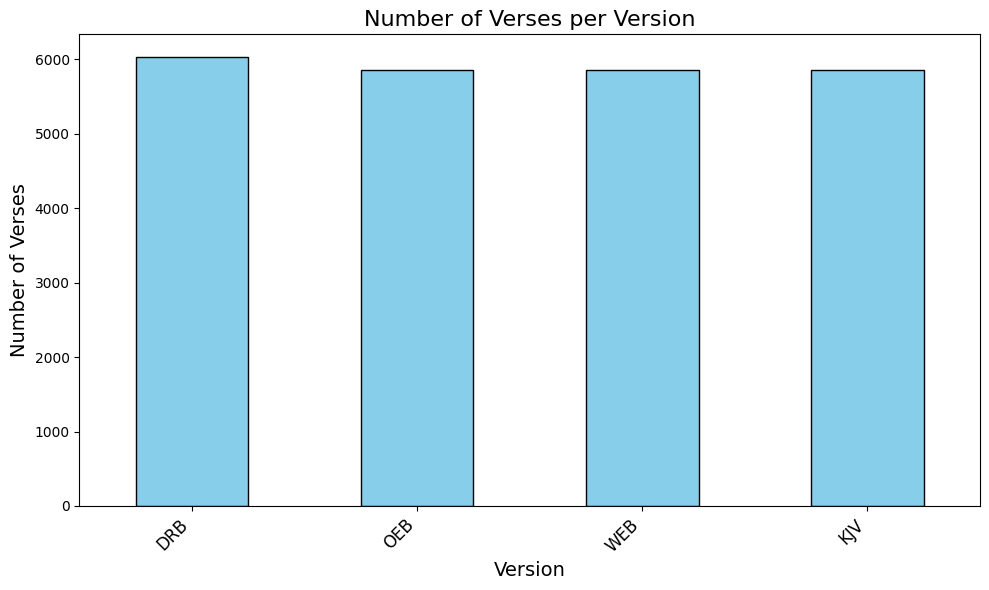

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "sorted_aligned_bible_final.tsv"  # Replace with your file path
bible_data = pd.read_csv(file_path, sep="\t")

# Count the number of rows per version
version_distribution = bible_data["Version"].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
version_distribution.plot(
    kind="bar",
    color="skyblue",  # Set a pleasant color for the bars
    edgecolor="black"
)
plt.title("Number of Verses per Version", fontsize=16)
plt.xlabel("Version", fontsize=14)
plt.ylabel("Number of Verses", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [224]:
# count all verses in the dataset
total_verses = bible_data.shape[0]
print(f"Total number of verses in the dataset: {total_verses}")


Total number of verses in the dataset: 23615


In [215]:
# rows per book
book_distribution = bible_data["Book"].value_counts()
print(book_distribution)

Book
The Book of Psalms                             4970
Psalms                                         4921
1 Corinthians                                   874
Romans                                          866
Revelation                                      810
                                               ... 
The Epistle of Paul the Apostle to Philemon      25
The Epistle of St. Paul to Philemon              25
The Third Epistle General of John                14
The Second Epistle of St. John the Apostle       13
The Second Epistle General of John               13
Name: count, Length: 69, dtype: int64


In [216]:
# Average number of verses per book
avg_verses_per_book = bible_data.groupby("Book")["Verse"].count().mean()
print("Average Verses per Book:", avg_verses_per_book)

Average Verses per Book: 342.2463768115942


In [217]:
# Text length statistics
bible_data["Text_Length"] = bible_data["Text"].apply(len)
text_length_stats = bible_data["Text_Length"].describe()
print(text_length_stats)

count    23615.000000
mean       116.792335
std        138.268036
min          5.000000
25%         76.000000
50%        100.000000
75%        139.000000
max      18319.000000
Name: Text_Length, dtype: float64


In [218]:
outliers = bible_data[bible_data["Text_Length"] > bible_data["Text_Length"].quantile(0.99)]
print(outliers[["Version", "Book", "Chapter", "Verse", "Text_Length"]])

      Version                                       Book  Chapter  Verse  \
14        DRB  The Epistle of St. Paul to the Colossians        1     15   
23        DRB  The Epistle of St. Paul to the Colossians        1     24   
46        DRB  The Epistle of St. Paul to the Colossians        2     18   
92        DRB  The Epistle of St. Paul to the Colossians        4     16   
522       DRB   The Epistle of St. Paul to the Ephesians        6     12   
...       ...                                        ...      ...    ...   
23150     OEB                                 Revelation       20      4   
23431     WEB                                 Revelation       13     10   
23496     WEB                                 Revelation       17      8   
23555     WEB                                 Revelation       20      4   
23614     WEB                                 Revelation       22     21   

       Text_Length  
14             363  
23             351  
46            1307  
92 

<Figure size 1600x1000 with 0 Axes>

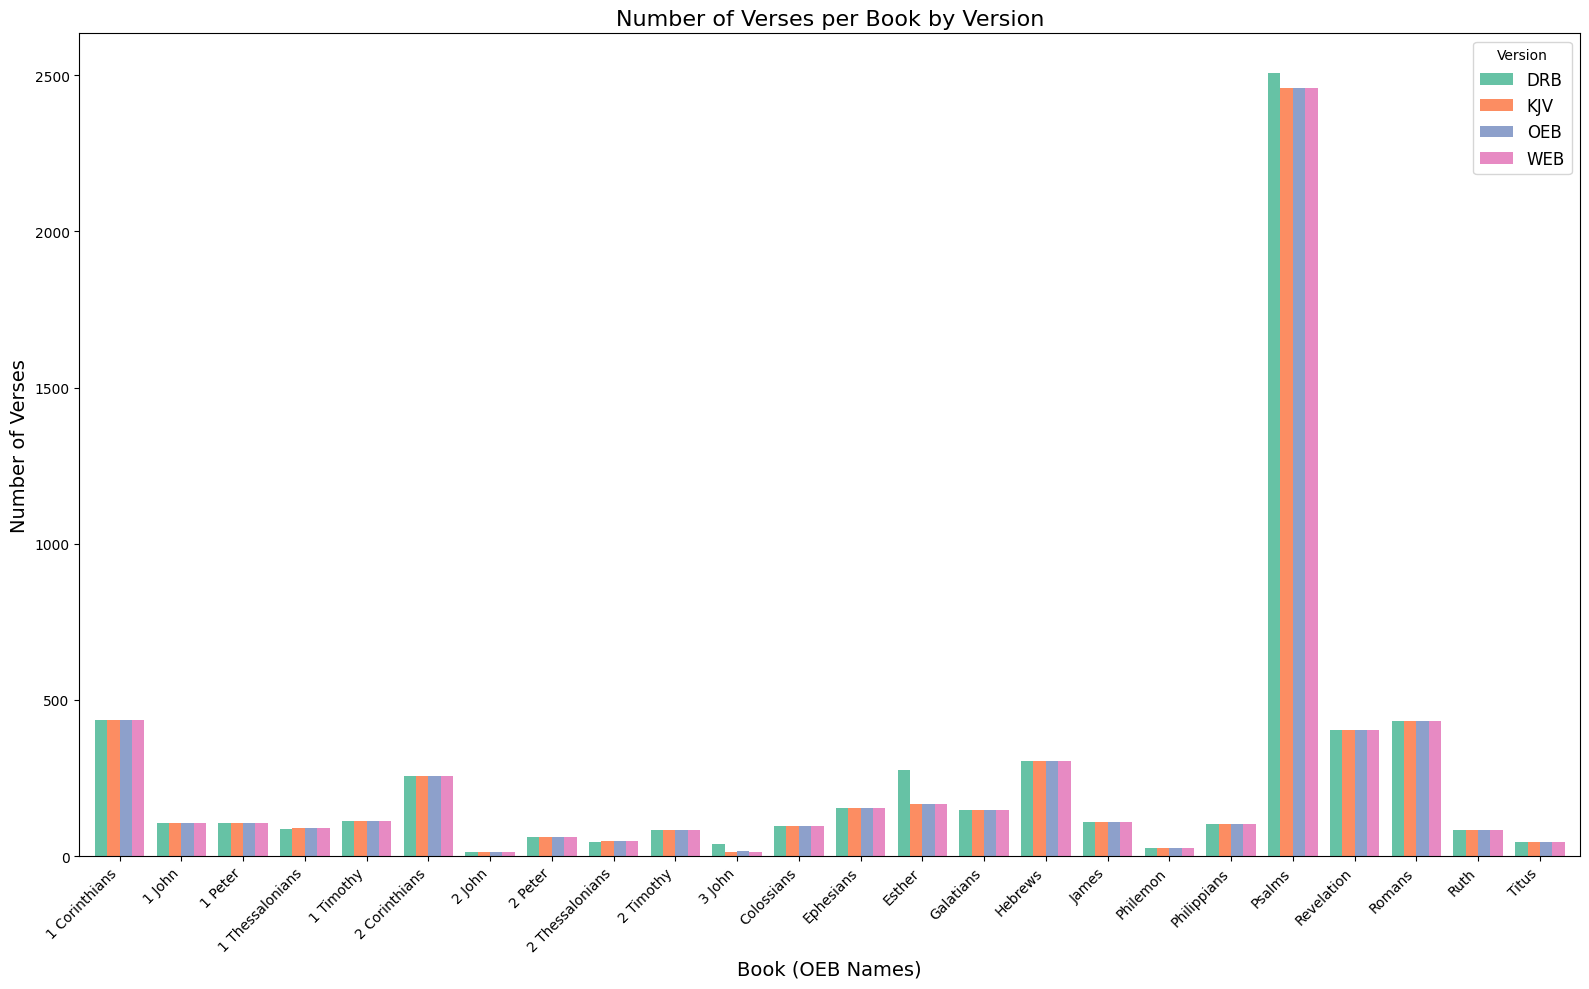

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "sorted_aligned_bible_final.tsv"  # Replace with your file path
bible_data = pd.read_csv(file_path, sep="\t")

# Group by Index and Version, counting the number of verses for each book
verse_counts = (
    bible_data.groupby(["Index", "Version"])
    .size()
    .reset_index(name="Verse Count")
)

# Add the OEB book names for Index
oeb_books = bible_data[bible_data["Version"] == "OEB"][["Index", "Book"]].drop_duplicates()
verse_counts = verse_counts.merge(oeb_books, on="Index", how="left")

# Pivot the data for plotting
pivoted_counts = verse_counts.pivot(index="Book", columns="Version", values="Verse Count").fillna(0)

# Plot the data with a new color palette
plt.figure(figsize=(16, 10))
pivoted_counts.plot(
    kind="bar",
    figsize=(16, 10),
    stacked=False,
    width=0.8,
    color=plt.cm.Set2.colors[:len(pivoted_counts.columns)]  # Use the Set2 color palette
)
plt.title("Number of Verses per Book by Version", fontsize=16)
plt.xlabel("Book (OEB Names)", fontsize=14)
plt.ylabel("Number of Verses", fontsize=14)
plt.legend(title="Version", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()
